In [4]:
import tensorflow as tf
from tensorflow import keras
print(tf.reduce_sum(tf.random.normal([1000, 1000])))
print(tf.config.list_physical_devices('GPU'))

tf.Tensor(41.635628, shape=(), dtype=float32)
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
mnist = keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


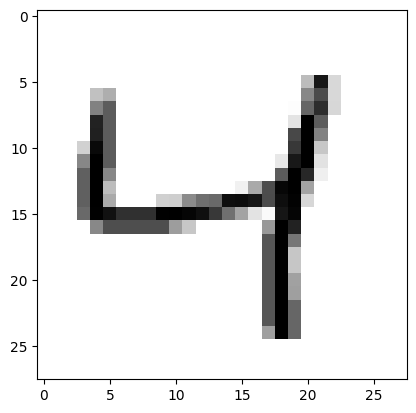

In [9]:
import matplotlib.pyplot as plt

plt.imshow(x_train[2], cmap='binary')
plt.show()

In [10]:
print(x_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [11]:
x_train = keras.utils.normalize(x_train, axis = 1)
x_test = keras.utils.normalize(x_test, axis = 1)


In [12]:
print(x_train[2])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Model

In [13]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten())
#The Flatten layer is used to transform the input tensor into a 1D tensor (vector), by flattening the input shape.

model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 4)

Epoch 1/4
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2656 - accuracy: 0.9212
Epoch 2/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1087 - accuracy: 0.9667
Epoch 3/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0757 - accuracy: 0.9761
Epoch 4/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0561 - accuracy: 0.9819


In [14]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0974 - accuracy: 0.9708
0.09738066047430038 0.97079998254776


In [15]:
model.save('mnist_dataset.model')

In [16]:
new_model = keras.models.load_model('mnist_dataset.model')

In [17]:
predictions = new_model.predict([
    x_test
])
print(predictions)

313/313 [==============================] - 1s 3ms/step
[[1.9078174e-10 8.3737968e-09 4.1804865e-06 ... 9.9999559e-01
  7.0215783e-10 2.9650378e-09]
 [4.3491957e-11 7.7299577e-05 9.9992275e-01 ... 3.5839723e-10
  1.3250201e-09 1.1312292e-16]
 [1.7384776e-08 9.9986184e-01 7.2534509e-05 ... 2.5626343e-05
  1.6700444e-05 7.9184623e-09]
 ...
 [4.7717159e-09 1.9341508e-06 1.3268893e-08 ... 4.1183590e-05
  2.3559184e-07 5.4900406e-06]
 [1.0377528e-04 8.8949366e-07 1.4333175e-06 ... 4.1832624e-07
  6.5654740e-03 4.6984860e-09]
 [2.6432250e-05 4.0594794e-09 1.3055184e-05 ... 1.0199455e-09
  5.3808253e-07 1.1759984e-09]]


In [18]:
import numpy as np

print(np.argmax(predictions[0]))

7


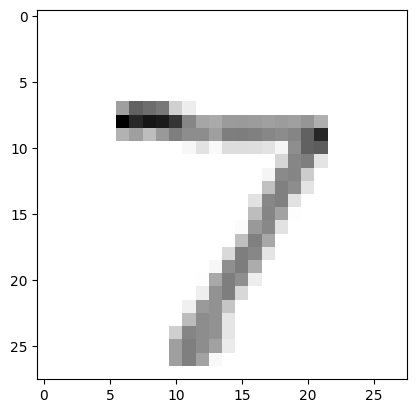

In [21]:
plt.imshow(x_test[0], cmap='binary')